<a href="https://colab.research.google.com/github/TarusinaDaria/practica-2/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сравнение метрик простой модели и бустинга

Подключаем необходимые библиотеки


In [24]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
     
from sklearn.model_selection import GridSearchCV



In [25]:
wine = load_wine()
X = wine.data 
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 30
)


wine_reg = DecisionTreeRegressor(max_depth=2)
wine_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

Строим график (схему)



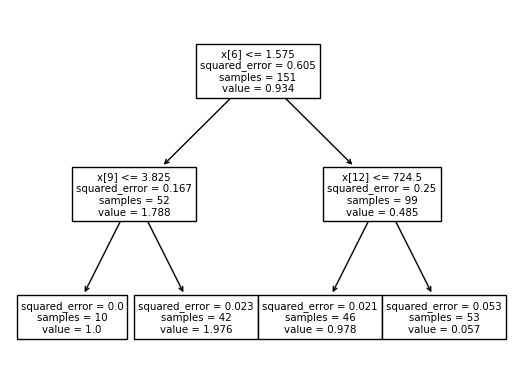

In [26]:
plot_tree(wine_reg);

Считаем MSE и MAE

In [27]:
y_pred = wine_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_2 = r2_score(y_test, y_pred)

print("MAE = ", mae)
print("MSE = ", mse)
     

MAE =  0.06432615278663949
MSE =  0.03419915962190326


In [28]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

X = np.round(X) 
X = X.astype(int) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=30)

model = CatBoostRegressor(iterations=1000,  
                          learning_rate=0.1, 
                          depth=2,  
                          random_state=30)  

model.fit(X_train, y_train, verbose=100)  
y_pred = model.predict(X_test)

# Оценка качества модели
mse_catboost = np.mean((y_test - y_pred) ** 2)  
mae_catboost = np.mean((y_test - y_pred))

print("MAE_CB = ", mae_catboost)
print("MSE_CB = ", mse_catboost)

0:	learn: 0.7211895	total: 266us	remaining: 266ms
100:	learn: 0.1547826	total: 9.73ms	remaining: 86.6ms
200:	learn: 0.1254548	total: 20.4ms	remaining: 80.9ms
300:	learn: 0.1037989	total: 30.2ms	remaining: 70ms
400:	learn: 0.0895563	total: 39.7ms	remaining: 59.3ms
500:	learn: 0.0780739	total: 48.7ms	remaining: 48.5ms
600:	learn: 0.0684358	total: 58.9ms	remaining: 39.1ms
700:	learn: 0.0604781	total: 68.8ms	remaining: 29.4ms
800:	learn: 0.0544579	total: 79.9ms	remaining: 19.8ms
900:	learn: 0.0496476	total: 89.4ms	remaining: 9.82ms
999:	learn: 0.0453225	total: 101ms	remaining: 0us
MAE_CB =  0.02881829770609605
MSE_CB =  0.06073819629716435


Теперь сравним метрики

In [30]:
print(" Метрики СatВoost:")
print("MAE_CB = ", mae_catboost)
print("MSE_CB = ", mse_catboost)

print("\n Метрики простой модели:")
print("MAE = ", mae)
print("MSE = ", mse)




 Метрики СatВoost:
MAE_CB =  0.02881829770609605
MSE_CB =  0.06073819629716435

 Метрики простой модели:
MAE =  0.06432615278663949
MSE =  0.03419915962190326


#Бустинг LightGBM


In [31]:
!pip install lightgbm
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
X = np.round(X)
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor(num_leaves=31,  
                          learning_rate=0.1,  
                          n_estimators=100,  
                          random_state=42)  
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)

mse_lightgbm = np.mean((y_test - y_pred) ** 2)  
mae_lightgbm = np.mean((y_test - y_pred))

print("MAE_lightgbm = ", mae_lightgbm)
print("MSE_lightgbm = ", mse_lightgbm)

MAE_lightgbm =  0.01054480523415597
MSE_lightgbm =  0.03439855505478344


#Подбор наилучших гиперпараметров для CatBoost


In [33]:
model = CatBoostRegressor()
param_grid = {
    'learning_rate': [0.1, 0.2],
    'depth': [2, 3, 4],
    'iterations': [900, 1000]
}

grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение RMSE на тестовом наборе: ", 
      np.sqrt(grid_search.score(X_test, y_test)))

Выходные данные были обрезаны до нескольких последних строк (5000).
2:	learn: 0.6273087	total: 1.11ms	remaining: 370ms
3:	learn: 0.5984971	total: 1.47ms	remaining: 366ms
4:	learn: 0.5591499	total: 1.83ms	remaining: 364ms
5:	learn: 0.5292475	total: 2.15ms	remaining: 357ms
6:	learn: 0.4999598	total: 2.5ms	remaining: 354ms
7:	learn: 0.4730047	total: 2.82ms	remaining: 349ms
8:	learn: 0.4403091	total: 3.14ms	remaining: 346ms
9:	learn: 0.4143048	total: 3.52ms	remaining: 348ms
10:	learn: 0.3892171	total: 3.88ms	remaining: 349ms
11:	learn: 0.3669673	total: 4.24ms	remaining: 349ms
12:	learn: 0.3485805	total: 4.56ms	remaining: 346ms
13:	learn: 0.3338229	total: 4.9ms	remaining: 345ms
14:	learn: 0.3148485	total: 5.23ms	remaining: 343ms
15:	learn: 0.2963470	total: 5.59ms	remaining: 344ms
16:	learn: 0.2822126	total: 5.93ms	remaining: 343ms
17:	learn: 0.2730499	total: 6.26ms	remaining: 342ms
18:	learn: 0.2575444	total: 6.6ms	remaining: 341ms
19:	learn: 0.2433136	total: 6.92ms	remaining: 339ms
20:	lea

In [34]:
model = lgb.LGBMRegressor()
param_grid = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
    'num_leaves': [31, 41]
}

grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение RMSE на тестовом наборе: ", 
      np.sqrt(grid_search.score(X_test, y_test)))

Наилучшие параметры:  {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
Наилучшее значение RMSE на тестовом наборе:  0.9742261176517144
